In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(cowplot)
    library(ggrepel)
    library(directlabels)
    library(geomtextpath)
    theme_set(theme_cowplot())
})
options(repr.plot.width=16,repr.plot.height=10)

# Labeling Data Series

## data

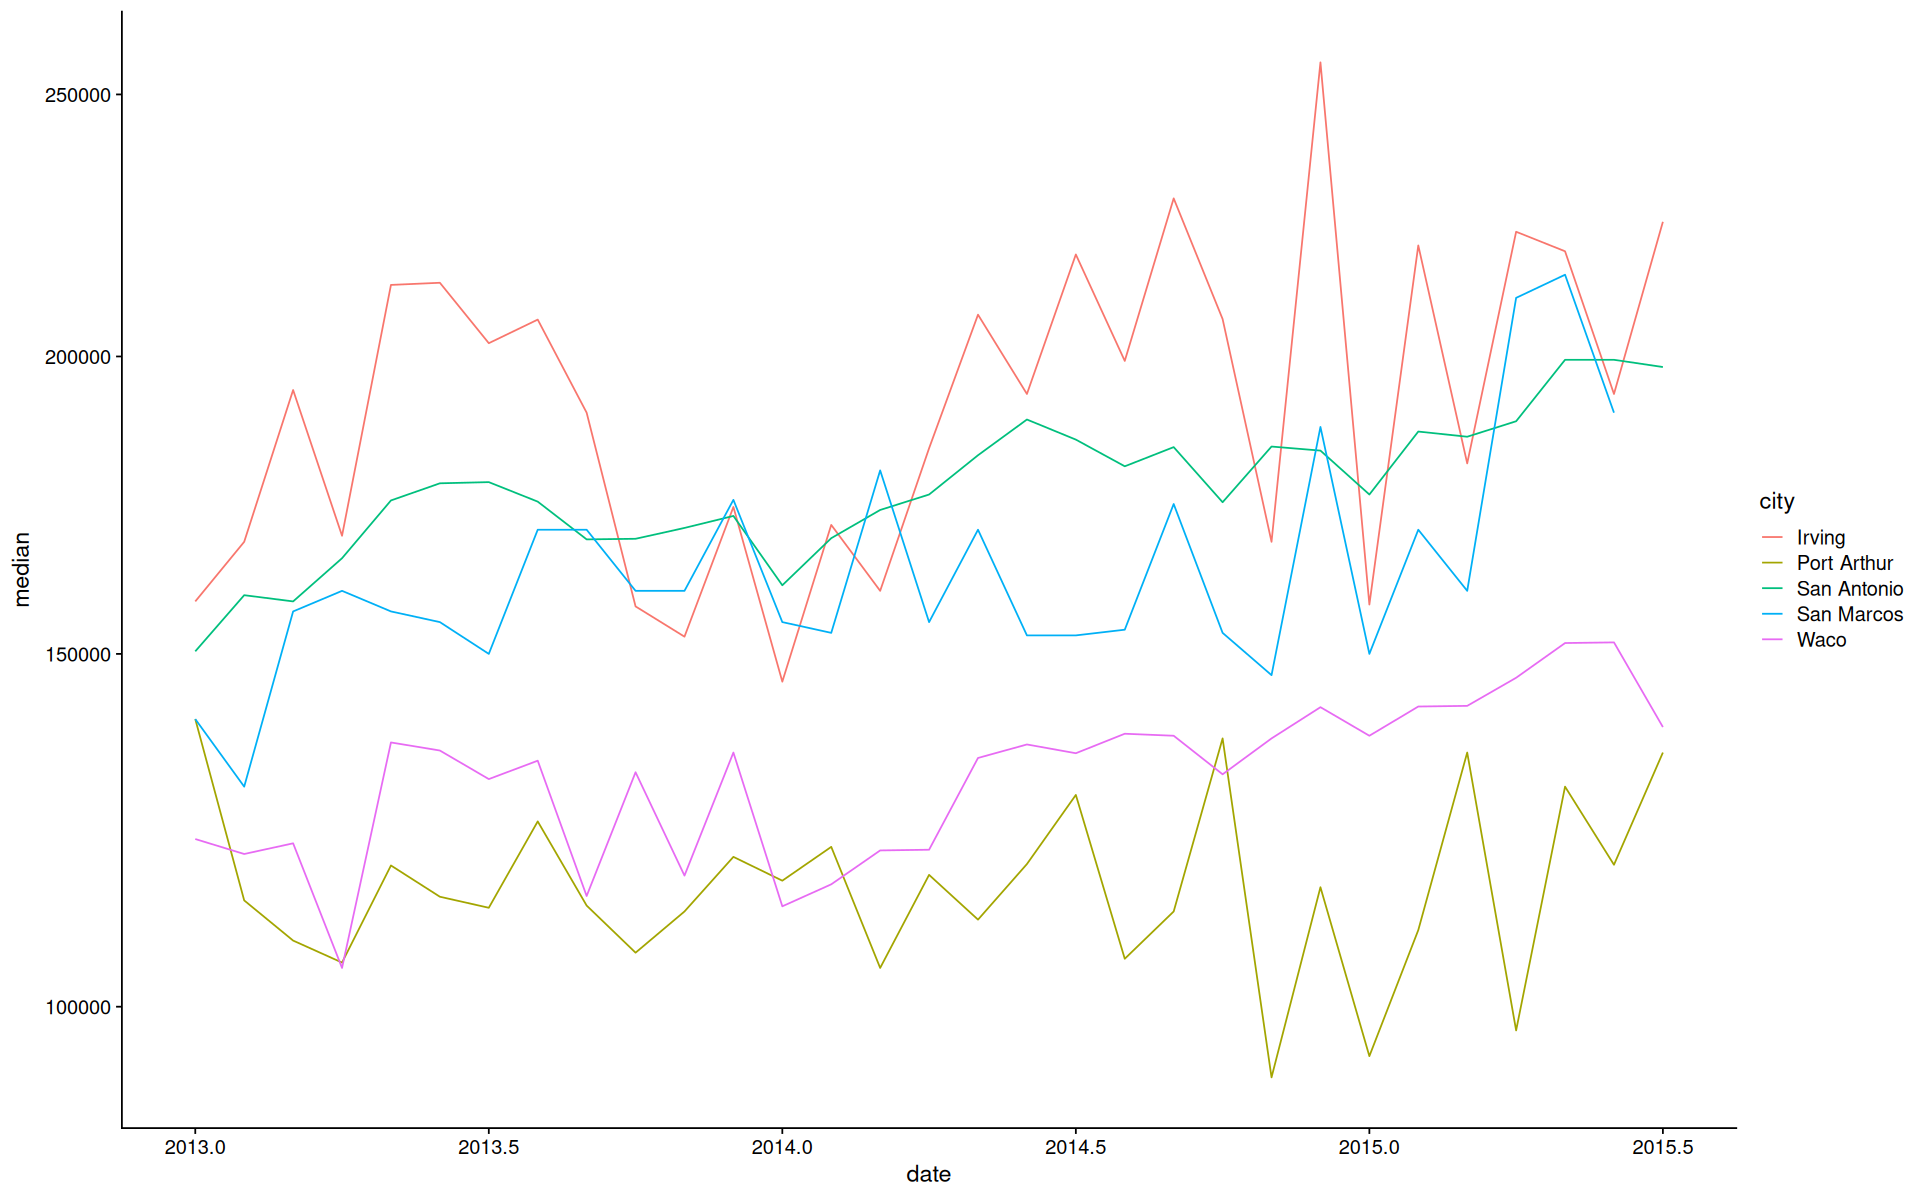

In [2]:
set.seed(456)
data <- filter(
    txhousing,
    city %in% sample(unique(txhousing$city), 5), 
    !is.na(median),
    year > 2012
)

ggplot(data, aes(x=date, y=median, color=city)) + 
geom_line() +
scale_y_sqrt()

# Labels at the end

see: https://ggrepel.slowkow.com/articles/examples

Warning message:
"Removed 149 rows containing missing values or values outside the scale range (`geom_label_repel()`)."


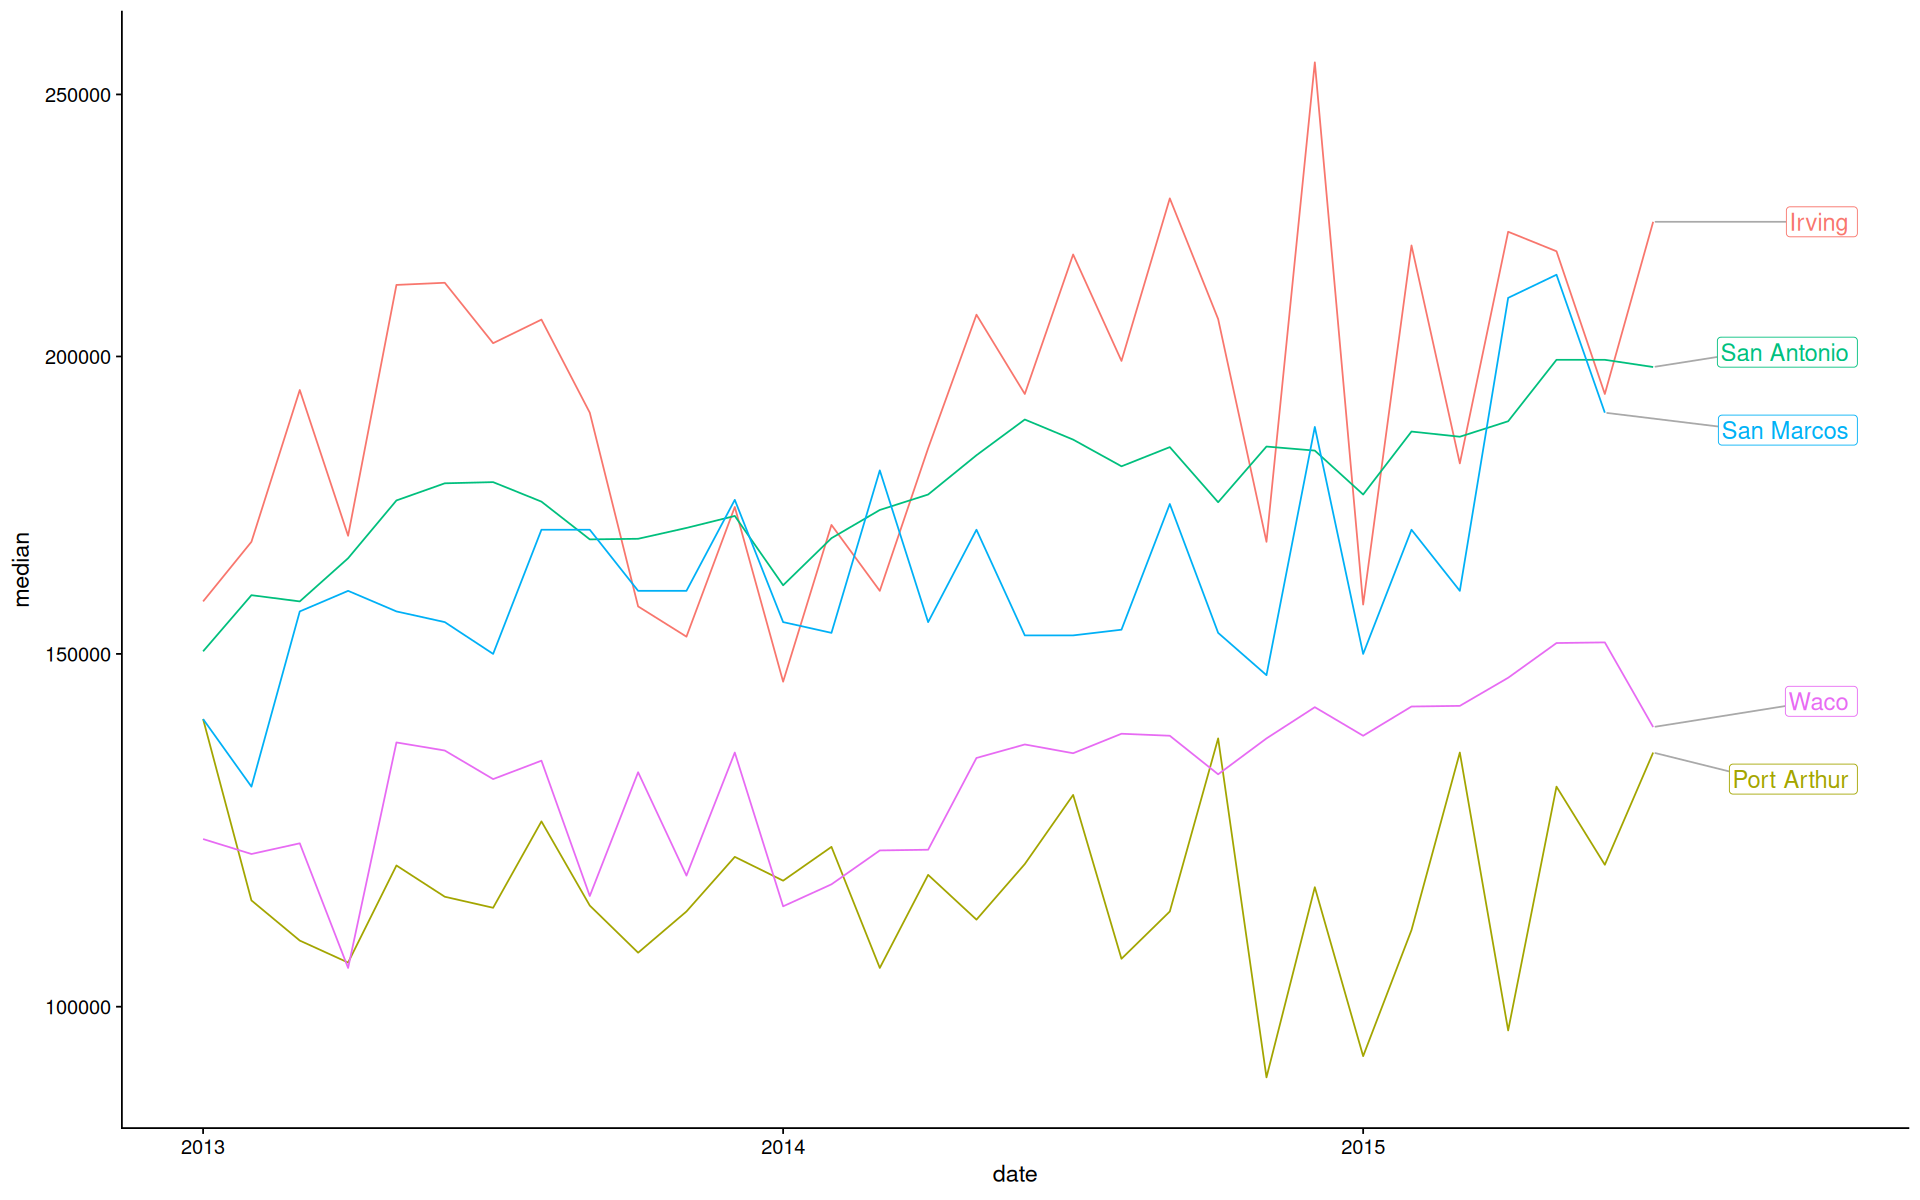

In [3]:
mutate(data,
       label=ifelse(date==max(date, na.rm=T), city, NA),
       .by=city
) |>
ggplot(aes(x=date, y=median, color=city)) + 
geom_line() +
geom_label_repel(aes(label=label), size=5, min.segment.length = 0, max.overlaps = Inf, box.padding = 1, segment.color='darkgray', nudge_x=0.3, hjust = "left",direction='y') +
guides(color='none') +
scale_y_sqrt()

# Labels at the peak (y-axis)

Warning message:
"Removed 148 rows containing missing values or values outside the scale range (`geom_label_repel()`)."


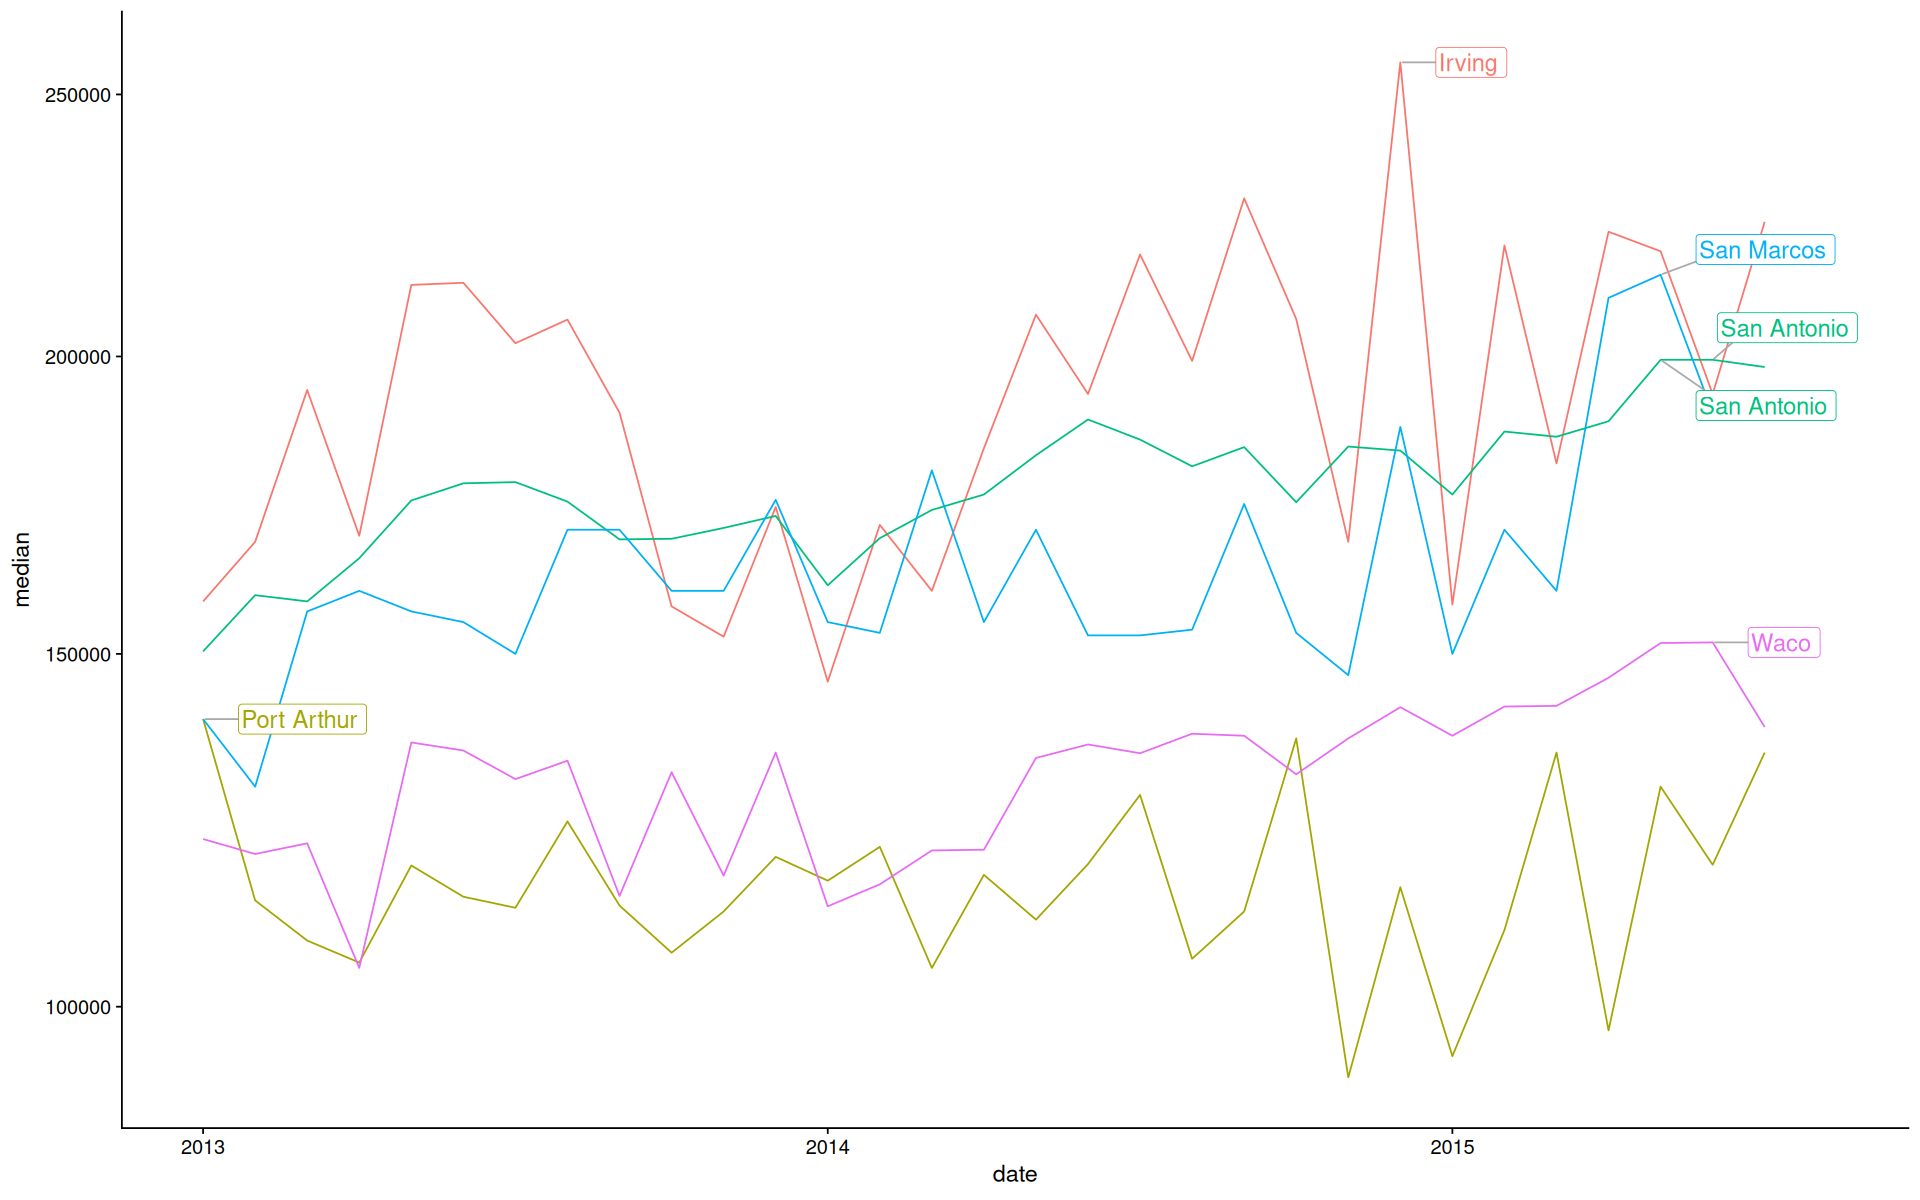

In [4]:
mutate(data,
       label=ifelse(median==max(median, na.rm=T), city, NA),
       .by=city
) |>
ggplot(aes(x=date, y=median, color=city)) + 
geom_line() +
geom_label_repel(aes(label=label), size=5, min.segment.length = 0, max.overlaps = Inf, box.padding = 1, segment.color='darkgray', nudge_x=0.1, hjust = "left",direction='y') +
guides(color='none') +
scale_y_sqrt()

# geomtextpath

see: https://cran.r-project.org/web/packages/geomtextpath/vignettes/geomtextpath.html

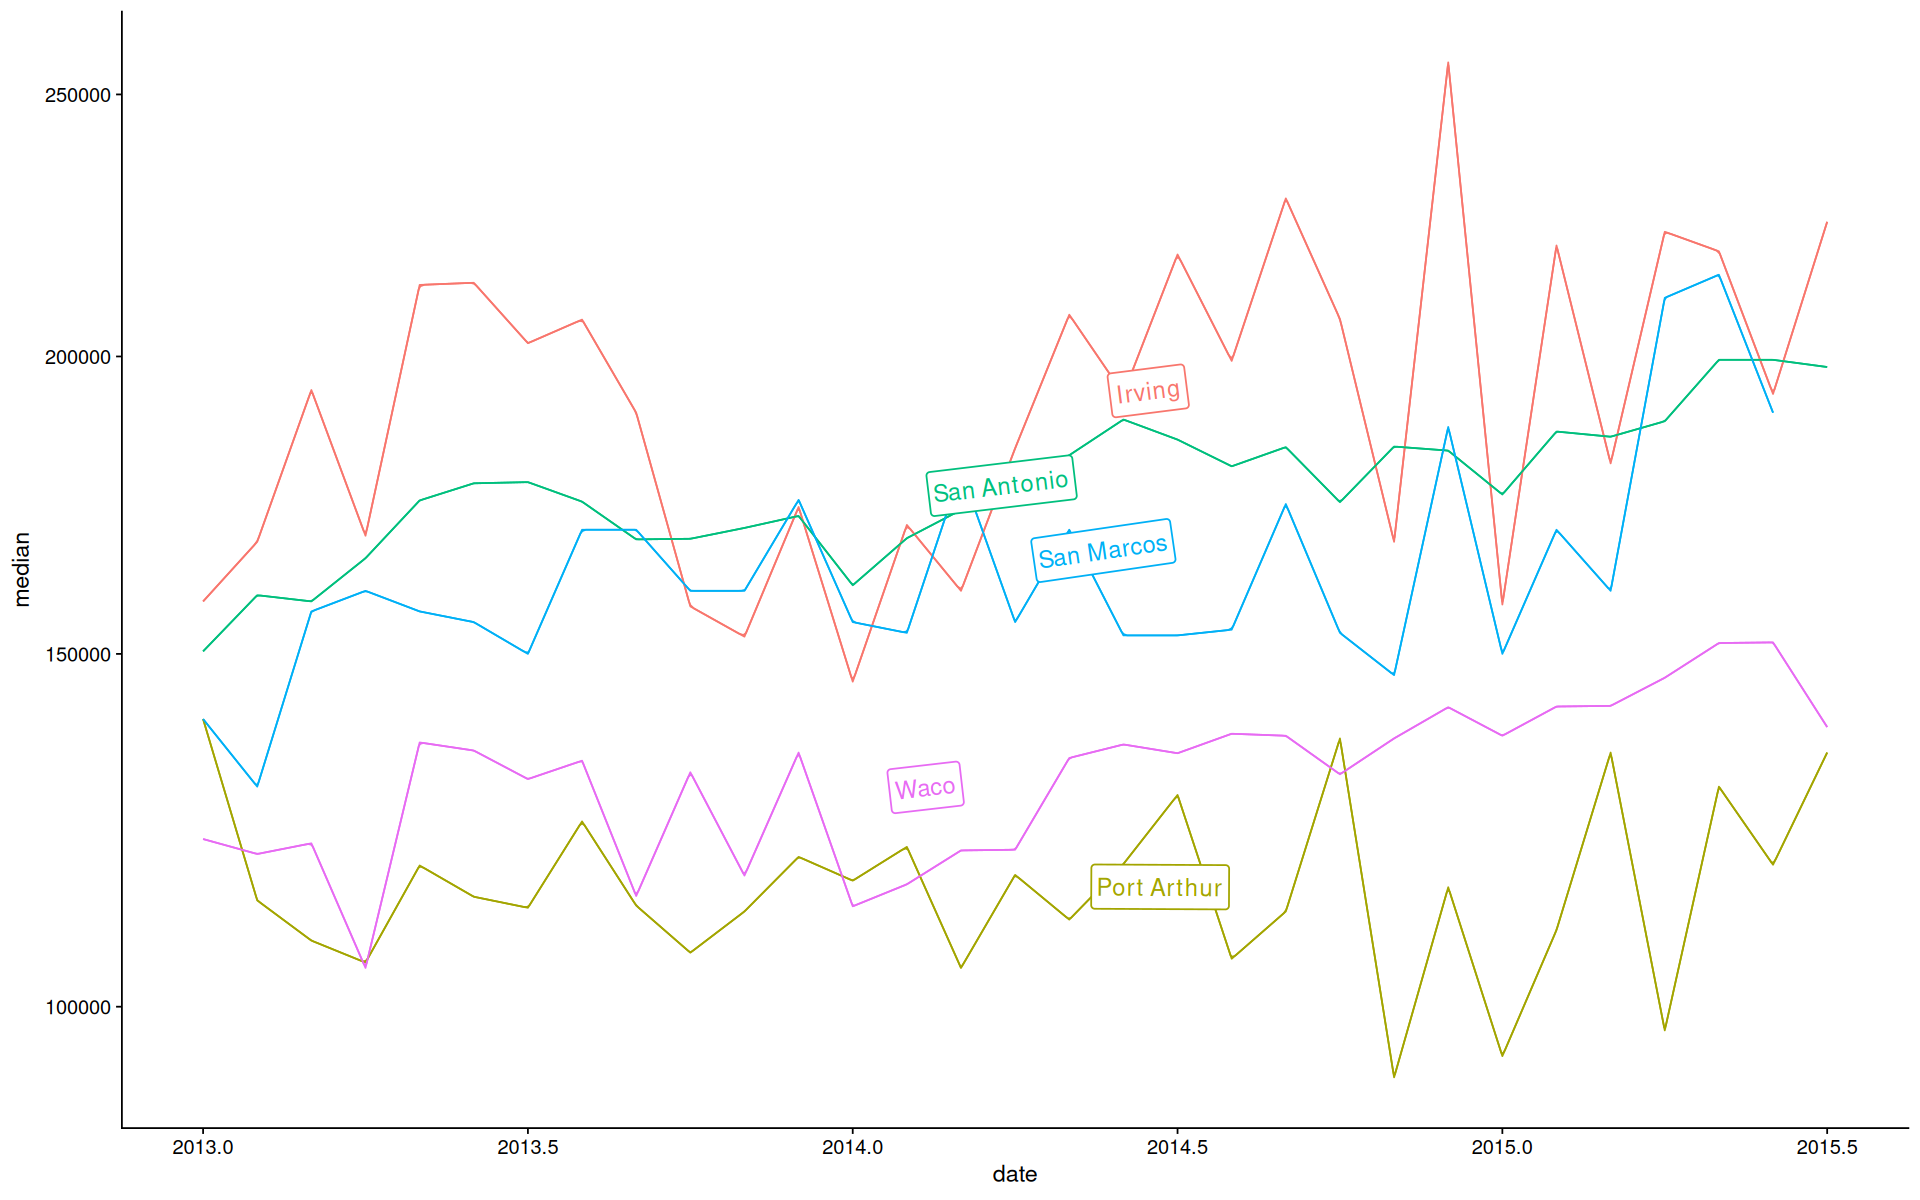

In [5]:
data |>
ggplot(aes(x=date, y=median, color=city, label=city)) + 
geom_line() +
geom_labelpath(text_smoothing = 100, size=5) +
guides(color='none') +
scale_y_sqrt()

# directlabels

see: https://cran.r-project.org/web/packages/directlabels/vignettes/examples.html

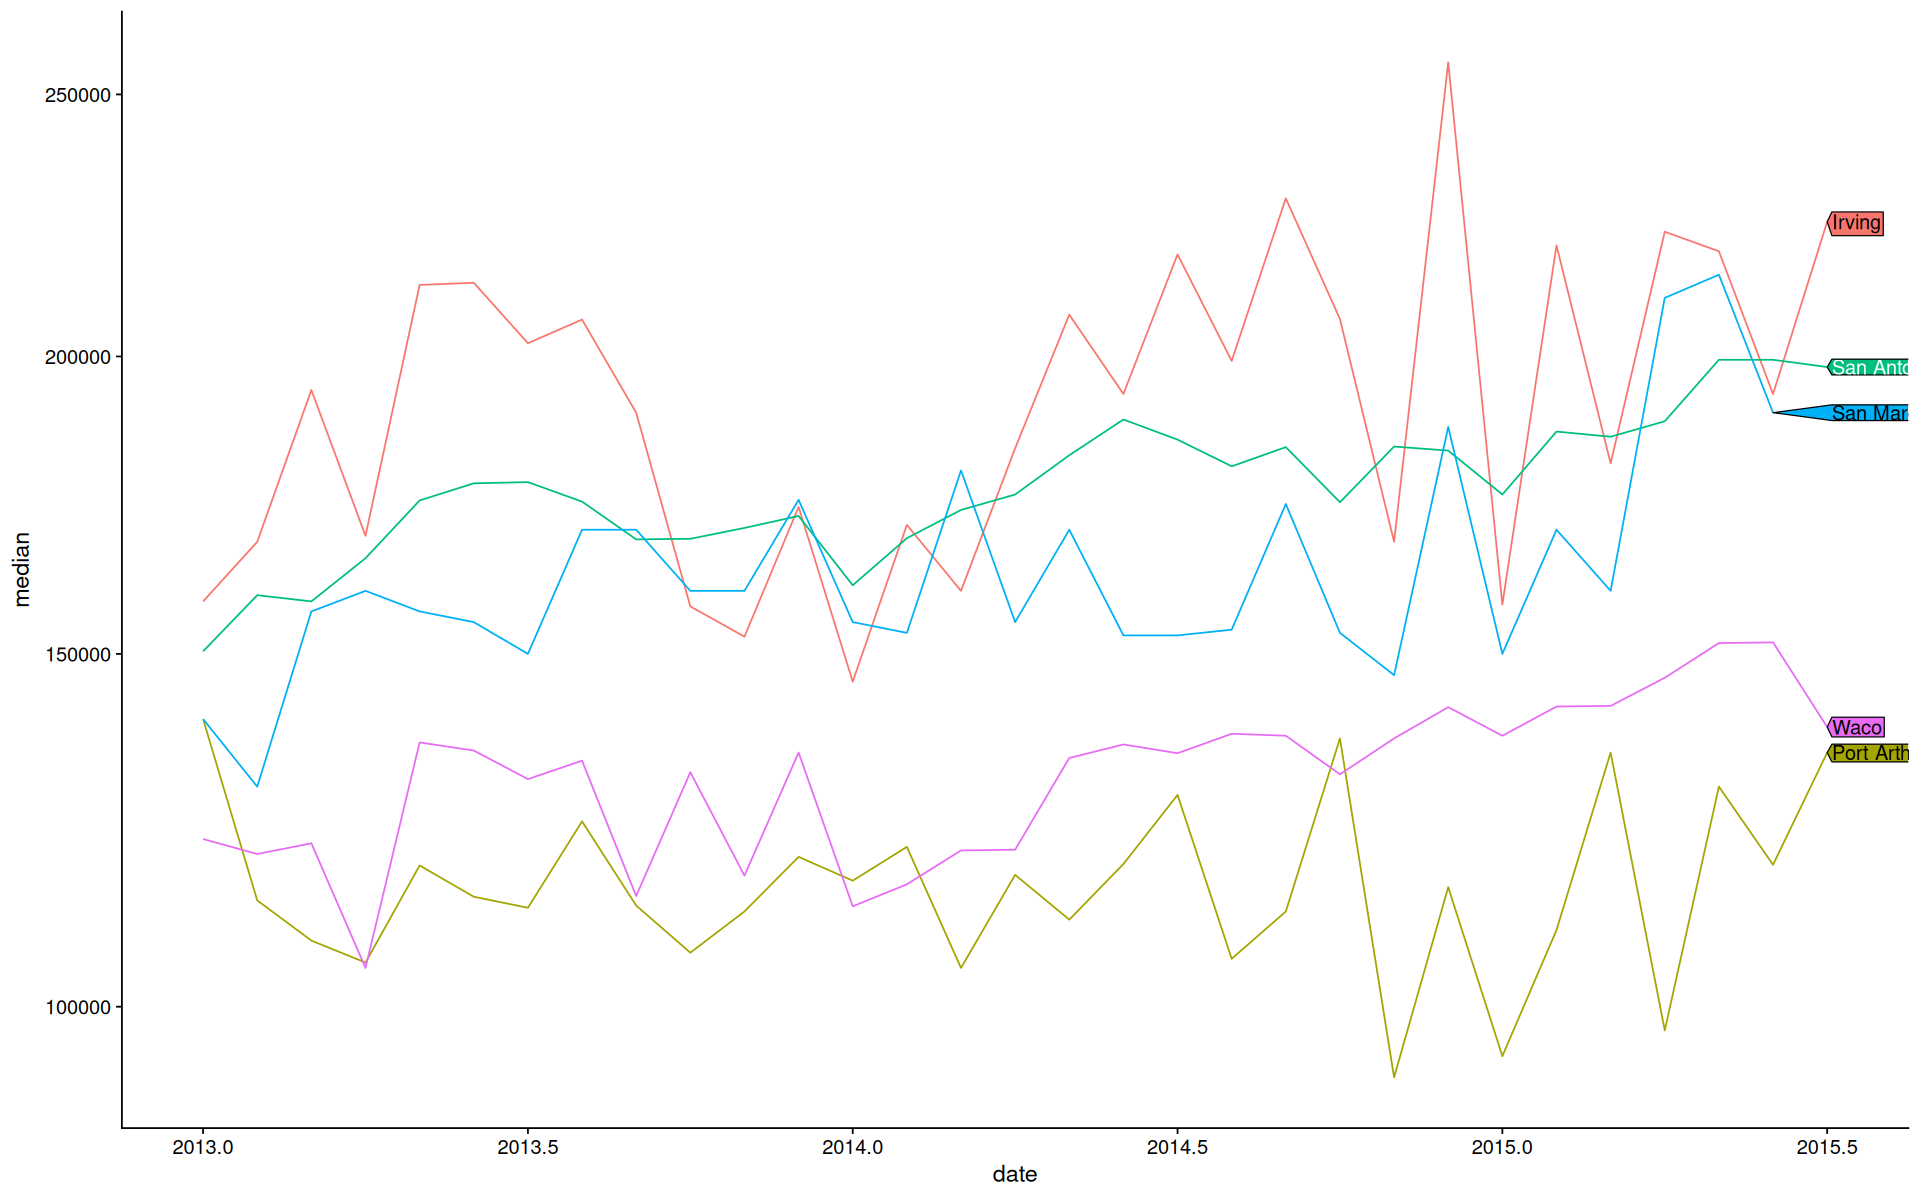

In [6]:
data |>
ggplot(aes(x=date, y=median, color=city, label=city)) + 
geom_line() +
geom_dl(method = list('right.polygons', cex=1)) +
guides(color='none') +
scale_y_sqrt()

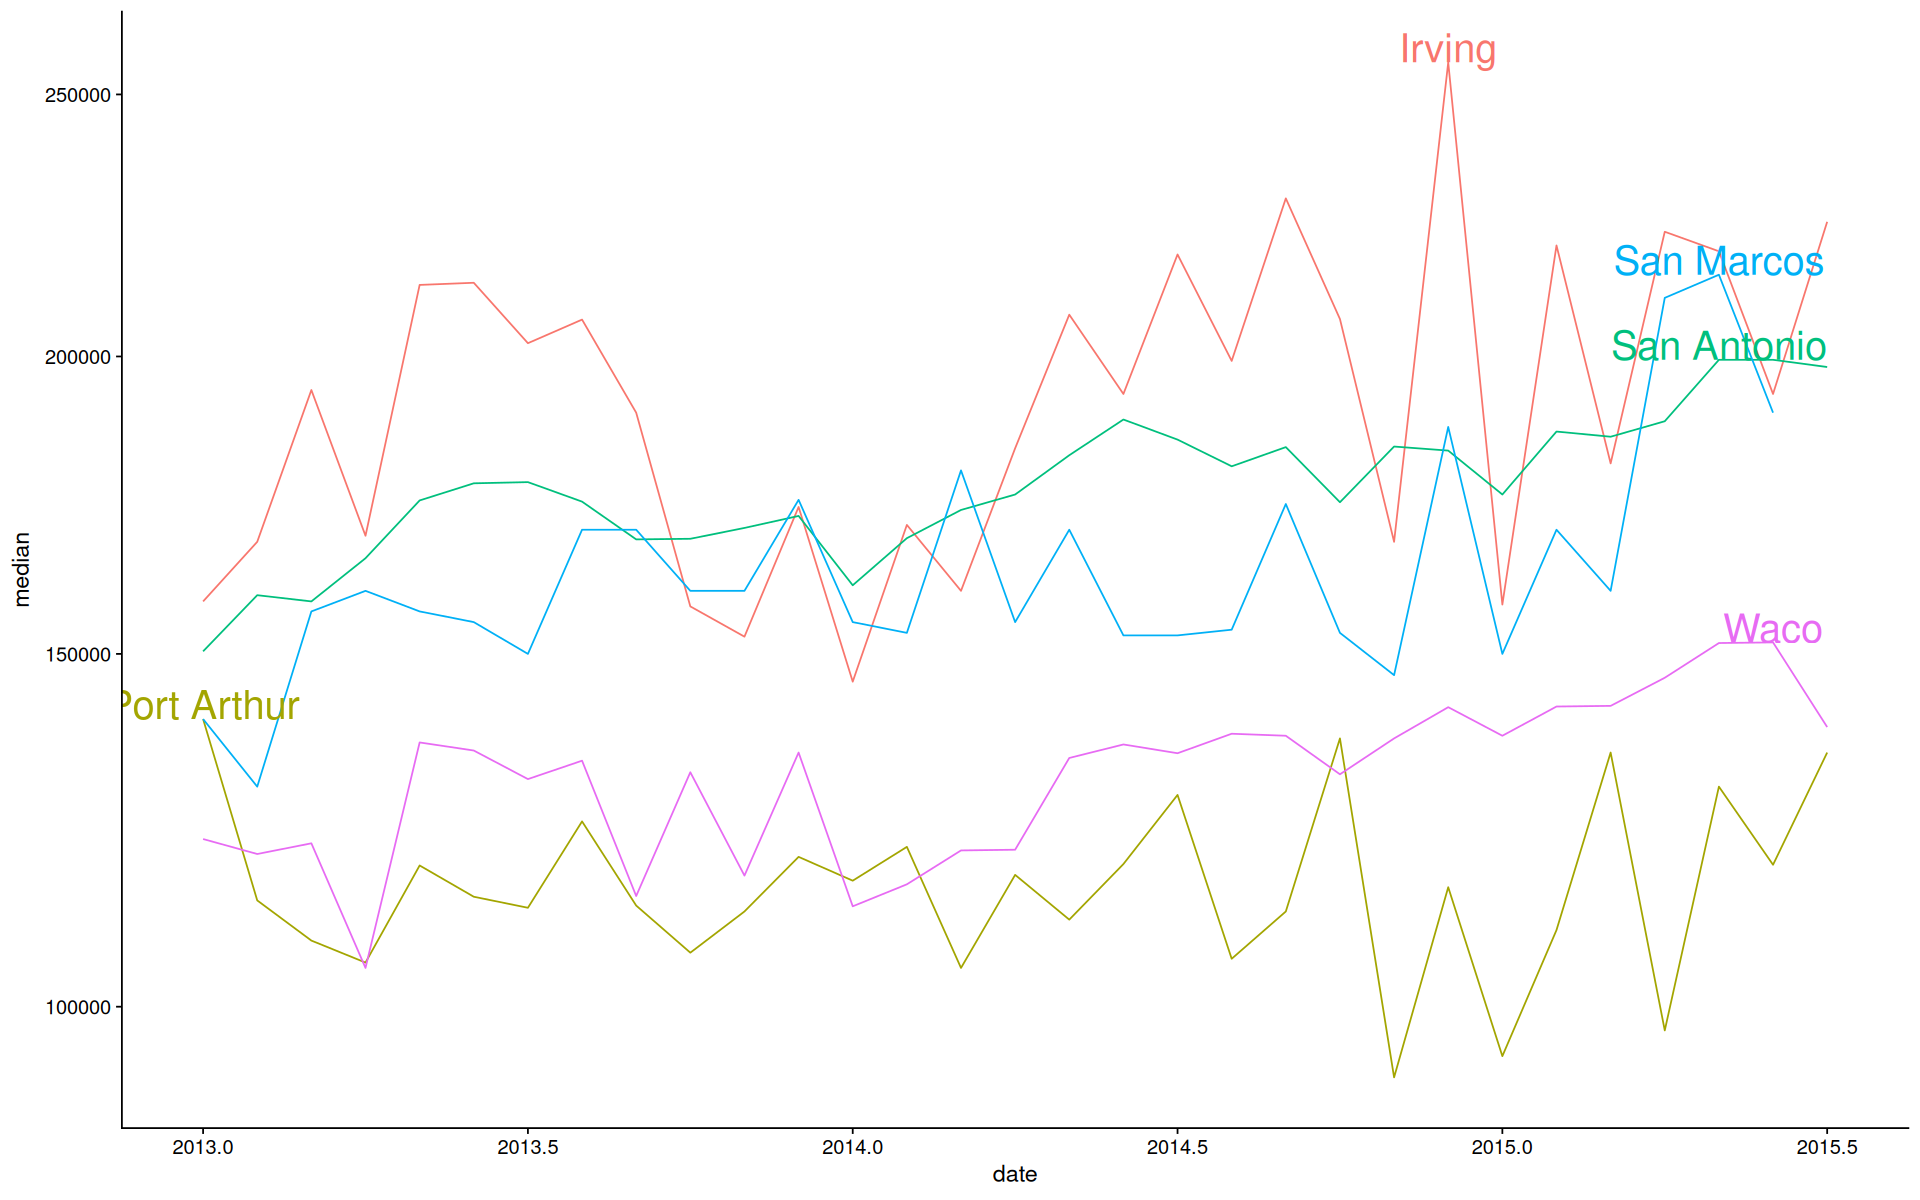

In [7]:
data |>
ggplot(aes(x=date, y=median, color=city, label=city)) + 
geom_line() +
geom_dl(method = list('top.bumpup', cex=2)) +
guides(color='none') +
scale_y_sqrt()